In [2]:
print('Neural Networ ... by manual programming')

Neural Networ ... by manual programming


In [17]:
import numpy as np

In [3]:
class SimpleClass():
  class_var1 = 'SimpleClass'
  def __init__(self,p):
    print(f"Print: {p}")
    print(f"Print: {self.class_var1}")

  def yell():
    print('Yelling')

class ExtendedClass(SimpleClass):
  class_var1 = 'ExtendedClass'
  def __init__(self, p):
        super().__init__("Hello")
        print(f"Print: {p}")
        print(f"Print: {self.class_var1}")

class Operation():
  def __init__(self, input_nodes=[]):
    self.input_nodes = input_nodes
    self.output_nodes = []

    for node in input_nodes:
      node.output_nodes.append(self)

    _default_graph.operations.append(self)

  def compute(self):
    pass



class add(Operation):
  def __init__(self,x,y):
    super().__init__([x,y])

  def compute(self, x_var, y_var):
    self.inputs = [x_var,y_var]
    return x_var + y_var

class multiply(Operation):
  def __init__(self,x,y):
    super().__init__([x,y])

  def compute(self, x_var, y_var):
    self.inputs = [x_var,y_var]
    return x_var * y_var

class matmul(Operation):
  def __init__(self,x,y):
    super().__init__([x,y])

  def compute(self, x_var, y_var):
    self.inputs = [x_var,y_var]
    return x_var.dot(y_var)

class Placeholder():
  def __init__(self):
    self.output_nodes = []

    _default_graph.placeholders.append(self)


class Variable():
  def __init__(self,initial_value =None):
    self.value = initial_value
    self.output_nodes =[]

    _default_graph.variables.append(self)

class Graph():
  def __init__(self):
    self.operations = []
    self.placeholders = []
    self.variables = []

  def set_as_default(self):
    global _default_graph
    _default_graph = self

In [4]:
g = Graph()

g.set_as_default()


A = Variable(10)
b = Variable(1)

x = Placeholder()

y = multiply(A,x)

z = add(y, b)



In [5]:
def traverse_postorder(operation):
  nodes_postorder = []
  def recurse(node):
    if isinstance(node, Operation):
      for input_node in node.input_nodes:
        recurse(input_node)
    nodes_postorder.append(node)

  recurse(operation)
  return nodes_postorder


In [30]:
class Session():
  def run(self, operation, feed_dict = {}):
    nodes_postorder = traverse_postorder(operation)

    for node in nodes_postorder:
      if type(node) == Placeholder:
        node.output = feed_dict[node]

      elif type(node) == Variable:
        node.output = node.value

      else:
        node.inputs = [input_node.output for input_node in node.input_nodes]

        node.output = node.compute(*node.inputs)


      if type(node.output) == list:
        node.output = np.array(node.output)


    return operation.output


sess = Session()

result = sess.run(operation = z, feed_dict={x:12})

result

array([[121, 241],
       [361, 481]])

In [23]:
g = Graph()
g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,1])

x = Placeholder()
y = matmul(A,x)
z= add(y,b)

sess = Session()

result = sess.run(operation=z, feed_dict={x:10})

result

array([[101, 201],
       [301, 401]])

**Create an Activation Function**

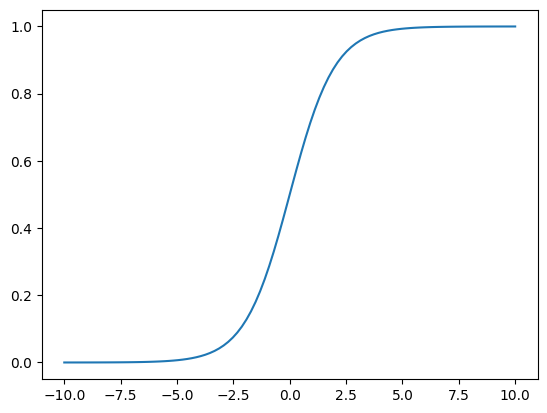

In [31]:
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1/(1 + np.exp(-z))

sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

plt.plot(sample_z,sample_a)



In [50]:
class Sigmoid(Operation):

  def __init__(self, z):
    super().__init__([z])

  def compute(self, z_val):
    return 1/(1 + np.exp(-z_val))

from sklearn.datasets import make_blobs

data = make_blobs(n_samples =50, n_features= 2, centers = 2, random_state= 75)

type(data)


tuple

In [51]:
data[0]

array([[  7.3402781 ,   9.36149154],
       [  9.13332743,   8.74906102],
       [  1.99243535,  -8.85885722],
       [  7.38443759,   7.72520389],
       [  7.97613887,   8.80878209],
       [  7.76974352,   9.50899462],
       [  8.3186688 ,  10.1026025 ],
       [  8.79588546,   7.28046702],
       [  9.81270381,   9.46968531],
       [  1.57961049,  -8.17089971],
       [  0.06441546,  -9.04982817],
       [  7.2075117 ,   7.04533624],
       [  9.10704928,   9.0272212 ],
       [  1.82921897,  -9.86956281],
       [  7.85036314,   7.986659  ],
       [  3.04605603,  -7.50486114],
       [  1.85582689,  -6.74473432],
       [  2.88603902,  -8.85261704],
       [ -1.20046211,  -9.55928542],
       [  2.00890845,  -9.78471782],
       [  7.68945113,   9.01706723],
       [  6.42356167,   8.33356412],
       [  8.15467319,   7.87489634],
       [  1.92000795,  -7.50953708],
       [  1.90073973,  -7.24386675],
       [  7.7605855 ,   7.05124418],
       [  6.90561582,   9.23493842],
 

In [52]:
data[1]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1])

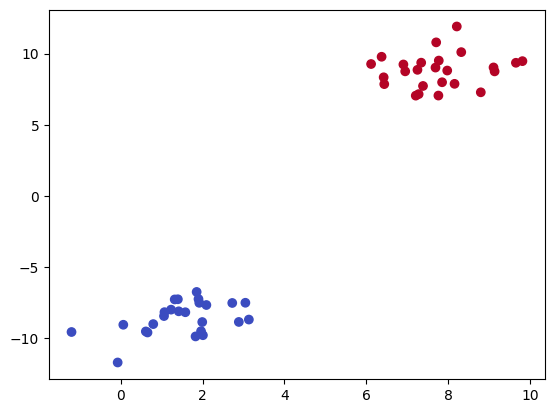

In [59]:
features = data[0]
labels = data[1]

plt.scatter(features[:,0], features[:,1], c = labels, cmap = 'coolwarm'  )

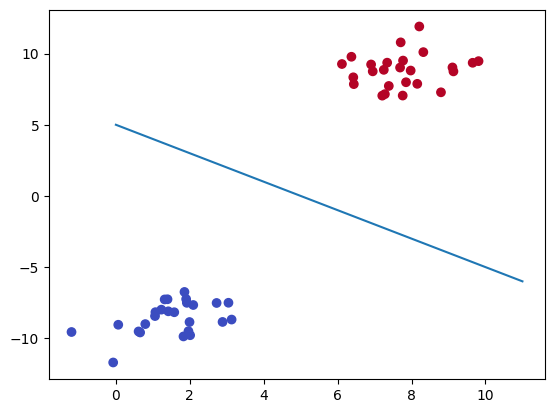

In [62]:
x = np.linspace(0,11, 10)
x
y = -x + 5

plt.scatter(features[:,0], features[:,1], c = labels, cmap = 'coolwarm'  )
plt.plot(x,y)


In [65]:
np.array([1,1]).dot(np.array([[8],[10]])) -5

array([13])

In [66]:
np.array([1,1]).dot(np.array([[2],[-10]])) -5

array([-13])

In [74]:
g = Graph()
g.set_as_default()

x = Placeholder()
w = Variable([1,1])
b = Variable(-5)

z = add(matmul(w,x),b)

a = Sigmoid(z)

sess = Session()


In [75]:
sess.run(operation=a, feed_dict={x:[8,10]})

0.999997739675702

In [76]:
sess.run(operation=a, feed_dict={x:[2,-10]})

2.2603242979035746e-06